In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# parámetros básicos del modelo
r = 0.1        # tasa de crecimiento diaria
k_max = 120    # altura máxima que podría alcanzar
h0 = 5.0       # tamaño inicial de la plantita

# condiciones que le gustan a la planta
humedad_optima = 0.6
temp_optima = 25

# cómo vamos a hacer la simulación
dias_totales = 100
paso_tiempo = 0.5
num_pasos = int(dias_totales / paso_tiempo) + 1  # +1 por si las moscas con el redondeo

# donde guardamos lo que va pasando
tiempo = np.linspace(0, dias_totales, num_pasos)
altura = np.zeros(num_pasos)
humedad = np.zeros(num_pasos)
temperatura = np.zeros(num_pasos)
capacidad = np.zeros(num_pasos)
factor_estres = np.zeros(num_pasos)  # para ver cómo sufre la planta

# empezamos con estos valores
altura[0] = h0
humedad[0] = 0.5
temperatura[0] = 20
capacidad[0] = k_max * min(humedad[0]/humedad_optima, 1)

for i in range(num_pasos-1):
    # vamos cambiando las condiciones como en la vida real
    if tiempo[i] < 15:
        hum_objetivo = 0.5
        temp_objetivo = 20
    elif tiempo[i] < 35:
        hum_objetivo = 0.3
        temp_objetivo = 30
    elif tiempo[i] < 60:
        hum_objetivo = 0.7
        temp_objetivo = 22
    else:
        hum_objetivo = 0.45
        temp_objetivo = 18

    # hacemos cambios suaves, nada de brusquedades
    humedad[i] = humedad[i] + 0.1 * (hum_objetivo - humedad[i])
    temperatura[i] = temperatura[i] + 0.1 * (temp_objetivo - temperatura[i])

    # vemos cómo afecta el calorcito (o el frío)
    diferencia_temp = abs(temperatura[i] - temp_optima)
    if diferencia_temp < 15:
        factor_temp = 1 - diferencia_temp * 0.025
    else:
        factor_temp = max(0.3, 1 - diferencia_temp * 0.04)

    # lo mismo pero con el agua
    diferencia_hum = abs(humedad[i] - humedad_optima)
    if diferencia_hum < 0.25:
        factor_hum = 1 - diferencia_hum * 2.5
    else:
        factor_hum = max(0.4, 1 - diferencia_hum * 3.0)

    # juntamos los dos factores de estrés
    factor_estres[i] = factor_temp * factor_hum

    # la capacidad máxima cambia según cómo esté el ambiente
    capacidad[i] = k_max * min(humedad[i]/humedad_optima, 1) * factor_estres[i]

    # calculamos cuánto crece hoy, con cuidado de no dividir por cero
    if capacidad[i] > 0.1:
        crecimiento = r * factor_estres[i] * altura[i] * (1 - altura[i]/capacidad[i])
    else:
        crecimiento = 0

    # actualizamos la altura de la planta
    altura[i+1] = max(0, altura[i] + crecimiento * paso_tiempo)

    # nos aseguramos que no crezca más de lo que puede
    altura[i+1] = min(altura[i+1], capacidad[i])

# completamos los últimos valores pa' que no queden vacíos
humedad[-1] = humedad[-2]
temperatura[-1] = temperatura[-2]
factor_estres[-1] = factor_estres[-2]
capacidad[-1] = capacidad[-2]



#ahora, para las gráficas bonitas#



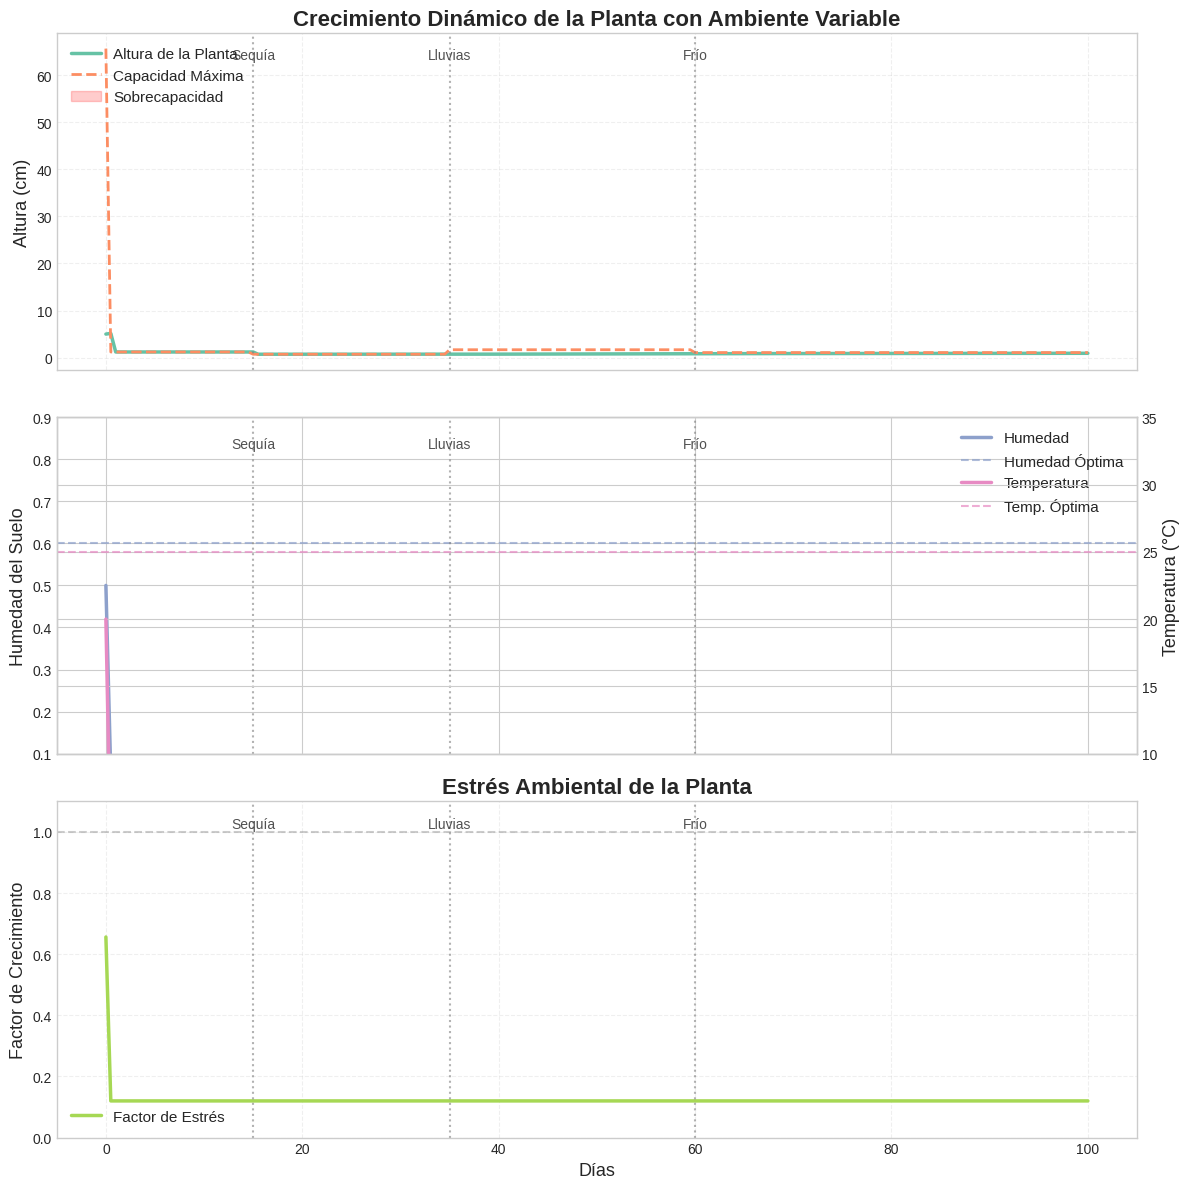

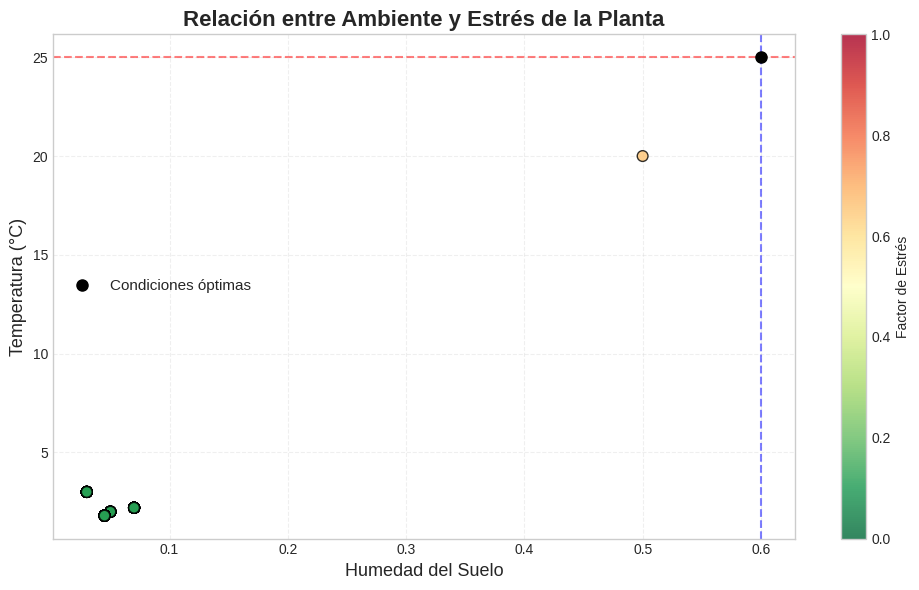

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
paleta = plt.get_cmap('Set2')


# hacemos un gráfico con tres partes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# gráfico 1: crecimiento de la planta
ax1.plot(tiempo, altura, color=paleta(0), linewidth=2.5, label='Altura de la Planta')
ax1.plot(tiempo, capacidad, '--', color=paleta(1), linewidth=2, label='Capacidad Máxima')
ax1.fill_between(tiempo, altura, capacidad, where=(altura > capacidad),
                 color='red', alpha=0.2, label='Sobrecapacidad')

ax1.set_title('Crecimiento Dinámico de la Planta con Ambiente Variable', fontsize=16, fontweight='bold')
ax1.set_ylabel('Altura (cm)', fontsize=13)
ax1.legend(loc='upper left', fontsize=11)
ax1.grid(True, linestyle='--', alpha=0.3)

# gráfico 2: condiciones ambientales
ax2.plot(tiempo, humedad, color=paleta(2), linewidth=2.5, label='Humedad')
ax2.axhline(humedad_optima, color=paleta(2), linestyle='--', linewidth=1.5, alpha=0.7, label='Humedad Óptima')
ax2.set_ylabel('Humedad del Suelo', fontsize=13)
ax2.set_ylim(0.1, 0.9)
ax2.legend(loc='upper left', fontsize=11)

# eje secundario para temperatura
ax2b = ax2.twinx()
ax2b.plot(tiempo, temperatura, color=paleta(3), linewidth=2.5, label='Temperatura')
ax2b.axhline(temp_optima, color=paleta(3), linestyle='--', linewidth=1.5, alpha=0.7, label='Temp. Óptima')
ax2b.set_ylabel('Temperatura (°C)', fontsize=13)
ax2b.set_ylim(10, 35)

# unimos las leyendas de ambos ejes
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2b.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=11)

# gráfico 3: estrés ambiental
ax3.plot(tiempo, factor_estres, color=paleta(4), linewidth=2.5, label='Factor de Estrés')
ax3.axhline(1.0, color='gray', linestyle='--', alpha=0.4)
ax3.set_title('Estrés Ambiental de la Planta', fontsize=16, fontweight='bold')
ax3.set_xlabel('Días', fontsize=13)
ax3.set_ylabel('Factor de Crecimiento', fontsize=13)
ax3.set_ylim(0, 1.1)
ax3.legend(fontsize=11)
ax3.grid(True, linestyle='--', alpha=0.3)

# eventos importantes en todos los gráficos

eventos = {15: 'Sequía', 35: 'Lluvias', 60: 'Frío'}
for ax in [ax1, ax2, ax3]:
    for x, etiqueta in eventos.items():
        ax.axvline(x=x, color='gray', linestyle=':', alpha=0.6)
        ymax = ax.get_ylim()[1]
        ax.text(x, ymax * 0.92, etiqueta, rotation=0, ha='center', fontsize=10, alpha=0.8)

plt.tight_layout()
plt.show()

# gráfico 4: relación ambiente-estrés
plt.figure(figsize=(10, 6))
sc = plt.scatter(humedad, temperatura, c=factor_estres, cmap='RdYlGn_r',
                 vmin=0, vmax=1, s=60, edgecolor='k', alpha=0.8)

# líneas para condiciones óptimas
plt.axvline(x=humedad_optima, color='blue', linestyle='--', alpha=0.5)
plt.axhline(y=temp_optima, color='red', linestyle='--', alpha=0.5)
plt.plot(humedad_optima, temp_optima, 'ko', markersize=8, label='Condiciones óptimas')

plt.colorbar(sc, label='Factor de Estrés')
plt.title('Relación entre Ambiente y Estrés de la Planta', fontsize=16, fontweight='bold')
plt.xlabel('Humedad del Suelo', fontsize=13)
plt.ylabel('Temperatura (°C)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()
